In [7]:
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load Camera calibration params
X_train, y_train, X_valid, y_valid, X_test, y_test = pickle.load(open( "pickle_data/base_data.p", "rb" ) )

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Basic Summary of the Data Set

In [8]:
%whos

Variable       Type       Data/Info
-----------------------------------
X_test         ndarray    12630x32x32x3: 38799360 elems, type `uint8`, 38799360 bytes (37.001953125 Mb)
X_train        ndarray    34799x32x32x3: 106902528 elems, type `uint8`, 106902528 bytes (101.9501953125 Mb)
X_valid        ndarray    4410x32x32x3: 13547520 elems, type `uint8`, 13547520 bytes (12.919921875 Mb)
csv            module     <module 'csv' from 'C:\\P<...>\\envs\\tf\\lib\\csv.py'>
i              int        0
image          ndarray    32x32x3: 3072 elems, type `uint8`, 3072 bytes
image_shape    tuple      n=3
index          int        19944
n              int        9907
n_classes      int        43
n_test         int        12630
n_train        int        34799
n_validation   int        4410
np             module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pickle         module     <module 'pickle' from 'C:<...>nvs\\tf\\lib\\pickle.py'>
plt            module     <module 'matplotlib.pypl

In [44]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


globalData = {'n_clasees':n_classes,
             'image_shape': image_shape,} 

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). 

Random training examples:


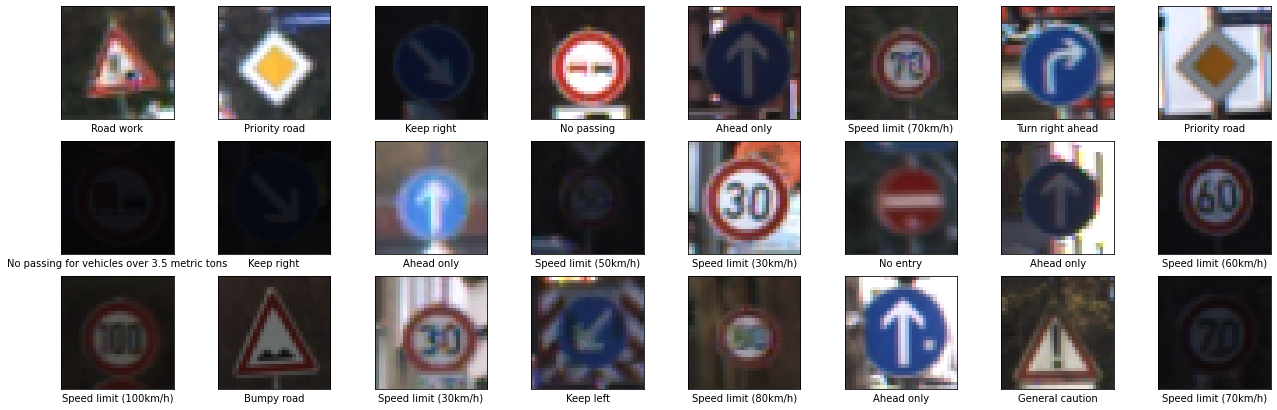

In [37]:
plt.figure(figsize=(22, 12))

signnames = [row[1] for row in csv.reader(open("signnames.csv"))][1:]

for i in range(24):
    plt.subplot(5, 8, 1+i)
    plt.yticks([])
    plt.xticks([])
    n = np.random.randint(n_train)
    plt.imshow(X_train[n], interpolation='nearest')
    plt.xlabel(signnames[y_train[n]])
print("Random training examples:")

# Helper to adapt images to full width
plt.show()

***
## Histograms for data distribution

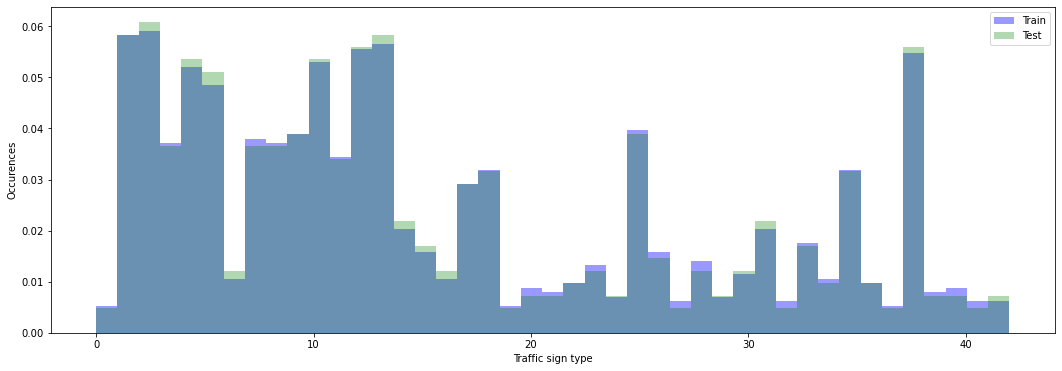

In [41]:
plt.figure(figsize=(18, 6))
plt.hist(y_train,density=1, bins=n_classes, alpha = 0.4, color  = 'blue', label= 'Train' ) 
plt.hist(y_test,density=1, bins=n_classes, alpha = 0.3, color  = 'green', label= 'Test' ) 

plt.xlabel('Traffic sign type')
plt.ylabel('Occurences')
plt.legend()
plt.show()

In [45]:
pickle.dump( globalData , open( "pickle_data/gData.p", "wb" ) )